## 1. `Data Reading and Understanding`

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Import data
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of dataset
data.shape

(1460, 81)

In [5]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. `Data Cleaning`

In [6]:
from  datetime import date

# Column with numeric data type which are  categorical in nature, so lets change the data type into category
data['MSSubClass'] = data['MSSubClass'].astype('category')
data['OverallQual'] = data['OverallQual'].astype('category')
data['OverallCond'] = data['OverallCond'].astype('category')

# Changing column with datetime data into ages 
data['YearBuilt'] = data['YearBuilt'].apply(lambda x:date.today().year-x)
data['YearRemodAdd'] = data['YearRemodAdd'].apply(lambda x:date.today().year-x)
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x:date.today().year-x)
data['MoSold'] = data['MoSold'].apply(lambda x:date.today().year-x)
data['YrSold'] = data['YrSold'].apply(lambda x:date.today().year-x)

In [7]:
# Null value percentage in column
data.isnull().sum()[(data.isnull().sum() > 0)] / data.shape[0] * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### `Handle Missing Value`

#### `Alley`

In [8]:
# Fill NaN with 'NA'
data['Alley'].fillna('NA', inplace=True)

In [9]:
# Check value_count
data['Alley'].value_counts(normalize=True) * 100

NA      93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64

#### `FireplaceQu`

In [10]:
# Fill NaN with 'NA'
data['FireplaceQu'].fillna('NA', inplace=True)

In [11]:
# Check value_count
data['FireplaceQu'].value_counts(normalize=True) * 100

NA    47.260274
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

#### `Fence`

In [12]:
# Fill NaN with 'NA'
data['Fence'].fillna('NA', inplace=True)

In [13]:
# Check value_count
data['Fence'].value_counts(normalize=True) * 100

NA       80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

#### `MiscFeature`

In [14]:
# Fill NaN with 'NA'
data['MiscFeature'].fillna('NA', inplace=True)

In [15]:
data['MiscFeature'].value_counts(normalize=True) * 100

NA      96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

- Here, Data are very skewed. It not give us much information.

In [16]:
# Drop column
data.drop('MiscFeature', axis=1, inplace=True)

#### `PoolQC`

In [17]:
# Fill NaN with 'NA'
data['PoolQC'].fillna('NA', inplace=True)

In [18]:
data['PoolQC'].value_counts(normalize=True) * 100

NA    99.520548
Gd     0.205479
Fa     0.136986
Ex     0.136986
Name: PoolQC, dtype: float64

- Here, Data are very skewed. It not give us much information.

In [19]:
# Drop column
data.drop('PoolQC', axis=1, inplace=True)

#### `LotFrontage`

In [20]:
# Check summary
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

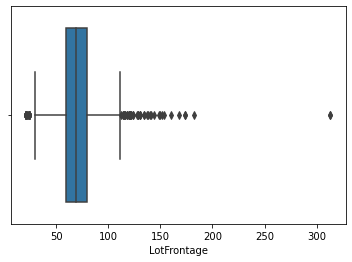

In [21]:
sns.boxplot(data['LotFrontage'])

In [22]:
# Cap data with 98 percentile
qut = data['LotFrontage'].quantile(0.98)
data['LotFrontage'] = np.where(data['LotFrontage'] > qut, qut, data['LotFrontage'])

In [23]:
# Fill null values with median
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

#### `MasVnrType`

In [24]:
# Fill null values with 'None'
data['MasVnrType'].fillna('None', inplace=True)

In [25]:
# Check value_count
data['MasVnrType'].value_counts(normalize=True) * 100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

#### `MasVnrArea`

In [26]:
# Check summary 
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

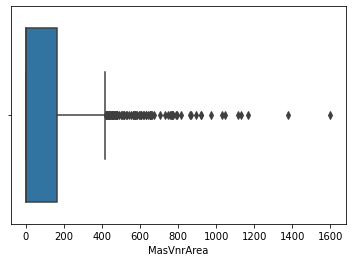

In [27]:
sns.boxplot(data['MasVnrArea'])

- More than 50% data centres around Zero.

In [28]:
# Fill null values with median
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

#### `BsmtQual`

In [29]:
# Fill null value with 'NA'
data['BsmtQual'].fillna('NA', inplace=True)

In [30]:
# Check value_count
data['BsmtQual'].value_counts(normalize=True) * 100

TA    44.452055
Gd    42.328767
Ex     8.287671
NA     2.534247
Fa     2.397260
Name: BsmtQual, dtype: float64

#### `BsmtCond`

In [31]:
# Fill null value with 'NA'
data['BsmtCond'].fillna('NA', inplace=True)

In [32]:
# Check value_count
data['BsmtCond'].value_counts(normalize=True) * 100

TA    89.794521
Gd     4.452055
Fa     3.082192
NA     2.534247
Po     0.136986
Name: BsmtCond, dtype: float64

#### `BsmtExposure`

In [33]:
# Fill null value with 'NA'
data['BsmtExposure'].fillna('NA', inplace=True)

In [34]:
# Check value_count
data['BsmtExposure'].value_counts(normalize=True) * 100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
NA     2.602740
Name: BsmtExposure, dtype: float64

#### `BsmtFinType1`

In [35]:
# Fill null value with 'NA'
data['BsmtFinType1'].fillna('NA', inplace=True)

In [36]:
# Check value_count
data['BsmtFinType1'].value_counts(normalize=True) * 100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
NA      2.534247
Name: BsmtFinType1, dtype: float64

#### `BsmtFinType2`

In [37]:
# Fill null value with 'NA'
data['BsmtFinType2'].fillna('NA', inplace=True)

In [38]:
# Check value_count
data['BsmtFinType2'].value_counts(normalize=True) * 100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
NA      2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

#### `GarageType`

In [39]:
# Fill null value with 'NA'
data['GarageType'].fillna('NA', inplace=True)

In [40]:
# Check value_count
data['GarageType'].value_counts(normalize=True) * 100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NA          5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

#### `GarageFinish`

In [41]:
# Fill null value with 'NA'
data['GarageFinish'].fillna('NA', inplace=True)

In [42]:
# Check value_count
data['GarageFinish'].value_counts(normalize=True) * 100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NA      5.547945
Name: GarageFinish, dtype: float64

#### `GarageQual`

In [43]:
# Fill null value with 'NA'
data['GarageQual'].fillna('NA', inplace=True)

In [44]:
# Check value_count
data['GarageQual'].value_counts(normalize=True) * 100

TA    89.794521
NA     5.547945
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

#### `GarageCond`

In [45]:
# Fill null value with 'NA'
data['GarageCond'].fillna('NA', inplace=True)

In [46]:
# Check value_count
data['GarageCond'].value_counts(normalize=True) * 100

TA    90.821918
NA     5.547945
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

#### `GarageYrBlt`

In [47]:
# Check summary
data['GarageYrBlt'].describe()

count    1379.000000
mean       42.493836
std        24.689725
min        11.000000
25%        19.000000
50%        41.000000
75%        60.000000
max       121.000000
Name: GarageYrBlt, dtype: float64

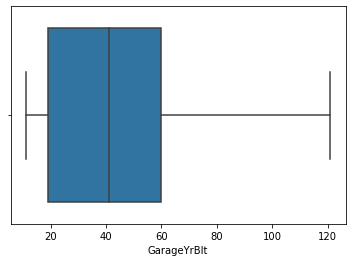

In [48]:
sns.boxplot(data['GarageYrBlt'])

In [49]:
# Fill null value with median
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

#### `Electrical`

In [50]:
# Fill null value with mode
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [51]:
# Check value_count
data['Electrical'].value_counts(normalize=True) * 100

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [52]:
# Drop id column
data.drop('Id', axis=1, inplace=True)

In [53]:
# Null value percentage in column
data.isnull().sum() [data.isnull().sum() > 0]

Series([], dtype: int64)

In [54]:
# Shape of dataset
data.shape

(1460, 78)

In [55]:
# Numerical columns
num_col = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == 'float64')].index.to_list()
print(num_col)
print()
print(len(num_col))

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

34


In [56]:
# Categorical columns
cat_col = data.dtypes[(data.dtypes == 'category') | (data.dtypes == 'object')].index.to_list()
print(cat_col)
print()
print(len(cat_col))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

44


In [57]:
# Derive categorical skew columns
skew_cat_col = []
for i in cat_col:
    j = sum(data[i].value_counts(normalize=True) > 0.9)
    if j > 0:
        skew_cat_col.append(i)
        
print(skew_cat_col)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


In [58]:
# Drop column which has skew value
data.drop(skew_cat_col, axis=1, inplace=True)

In [59]:
# Categorical columns
cat_col = data.dtypes[(data.dtypes == 'category') | (data.dtypes == 'object')].index.to_list()

In [60]:
# Shape of dataset
data.shape

(1460, 66)

## 3. `EDA`

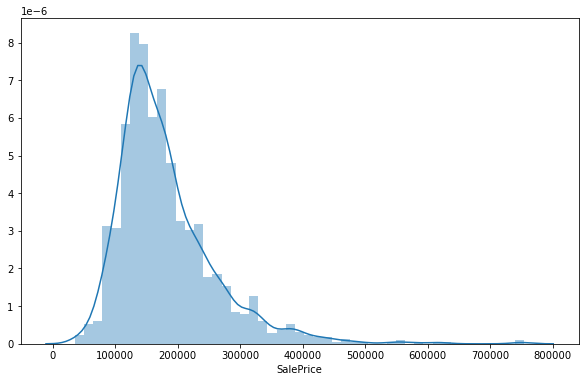

In [61]:
# Histogram of SalePrice
plt.figure(figsize=[10,6])
sns.distplot(data['SalePrice'])
plt.show()

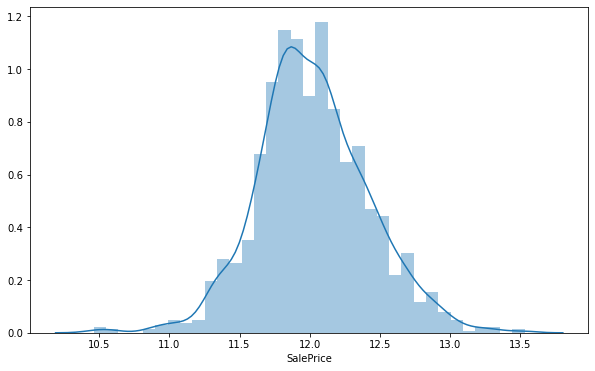

In [62]:
data['SalePrice'] = np.log(data['SalePrice'])
# Histogram of SalePrice
plt.figure(figsize=[10,6])
sns.distplot(data['SalePrice'])
plt.show()

- Data are Normally Distributed.

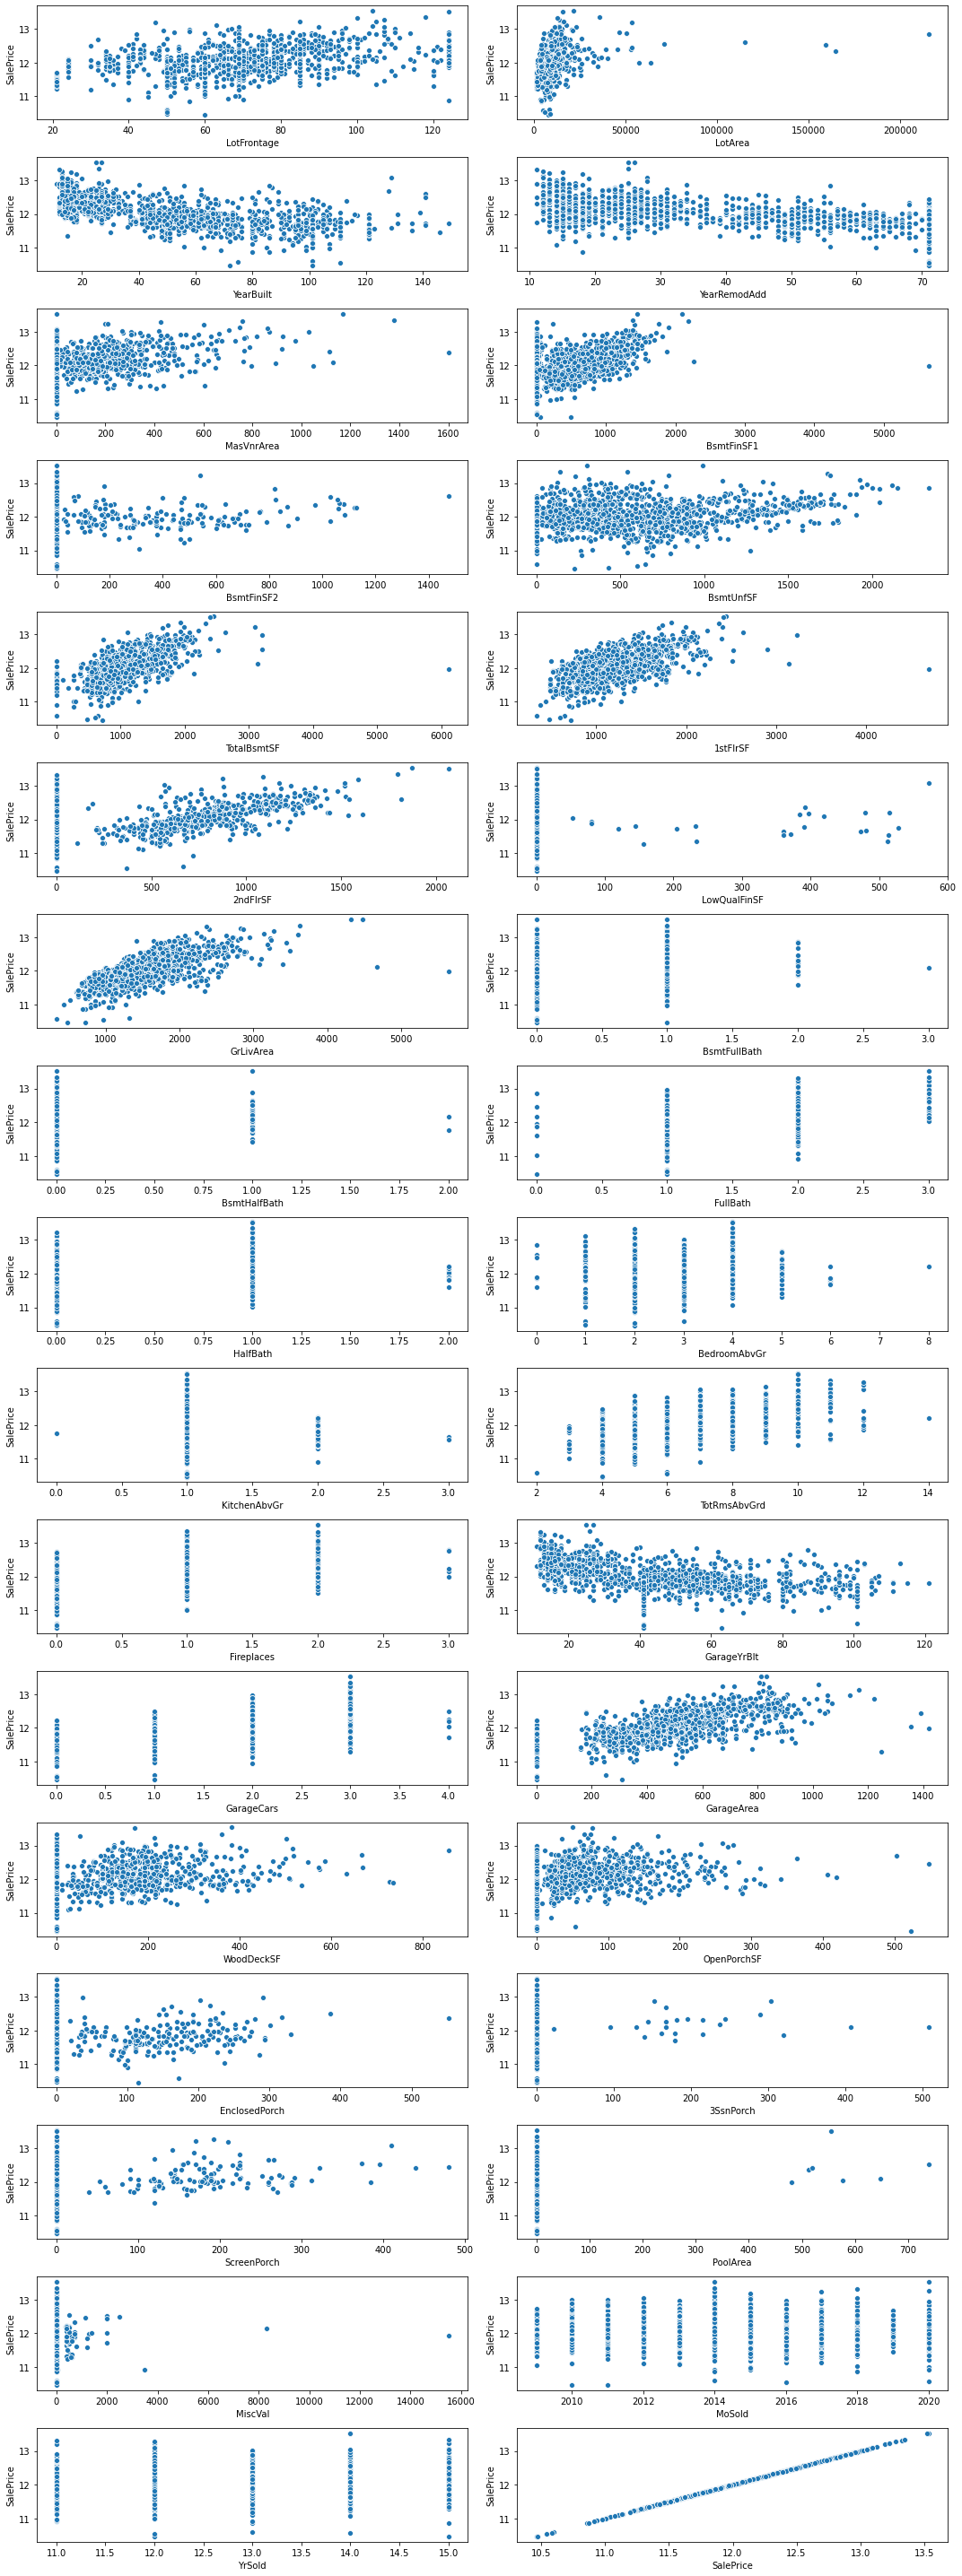

In [63]:
# Plot numerical data against SalePrice
plt.figure(figsize=[15,40])
j = 1
for i in num_col:
    plt.subplot(17,2,j)
    sns.scatterplot(x = data[i], y=data['SalePrice'])
    j = j + 1
plt.tight_layout()
plt.show()

- We can observe Linear Patterns with many attributes.

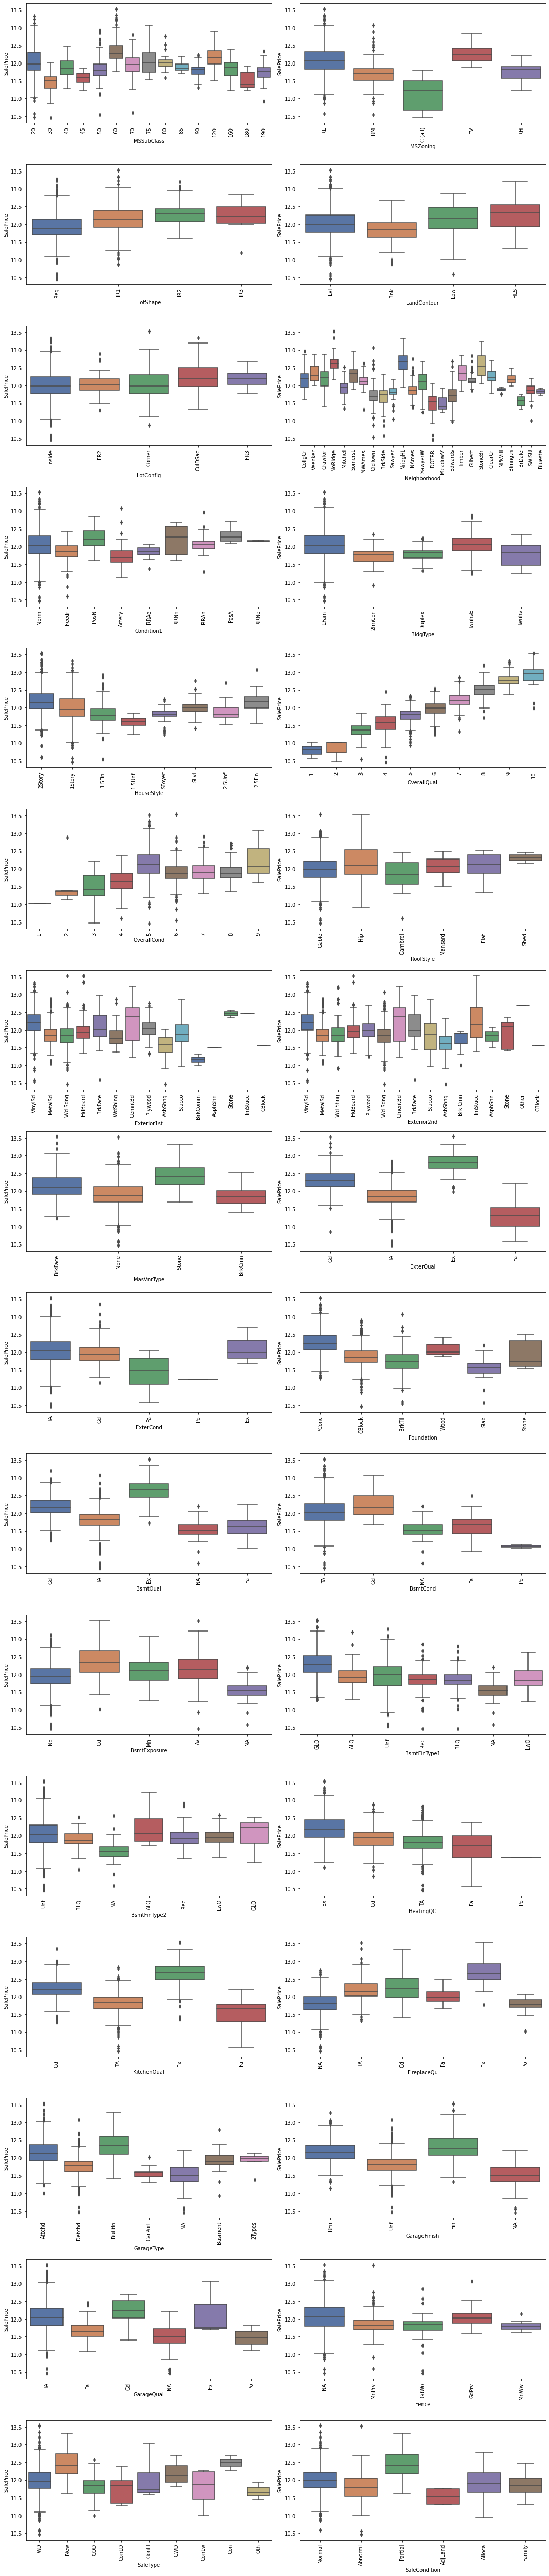

In [64]:
# Boxplot of categorical data with respect to SalePrice
plt.figure(figsize=[15,70])
j = 1
for i in cat_col:
    plt.subplot(16,2,j)
    sns.boxplot(x = data[i], y=data['SalePrice'], palette="deep")
    plt.xticks(rotation=90)
    j = j + 1
plt.tight_layout()
plt.show()

- We can observe many values above IQR but these are obvious values. We can't see any extreme high or extreme low.

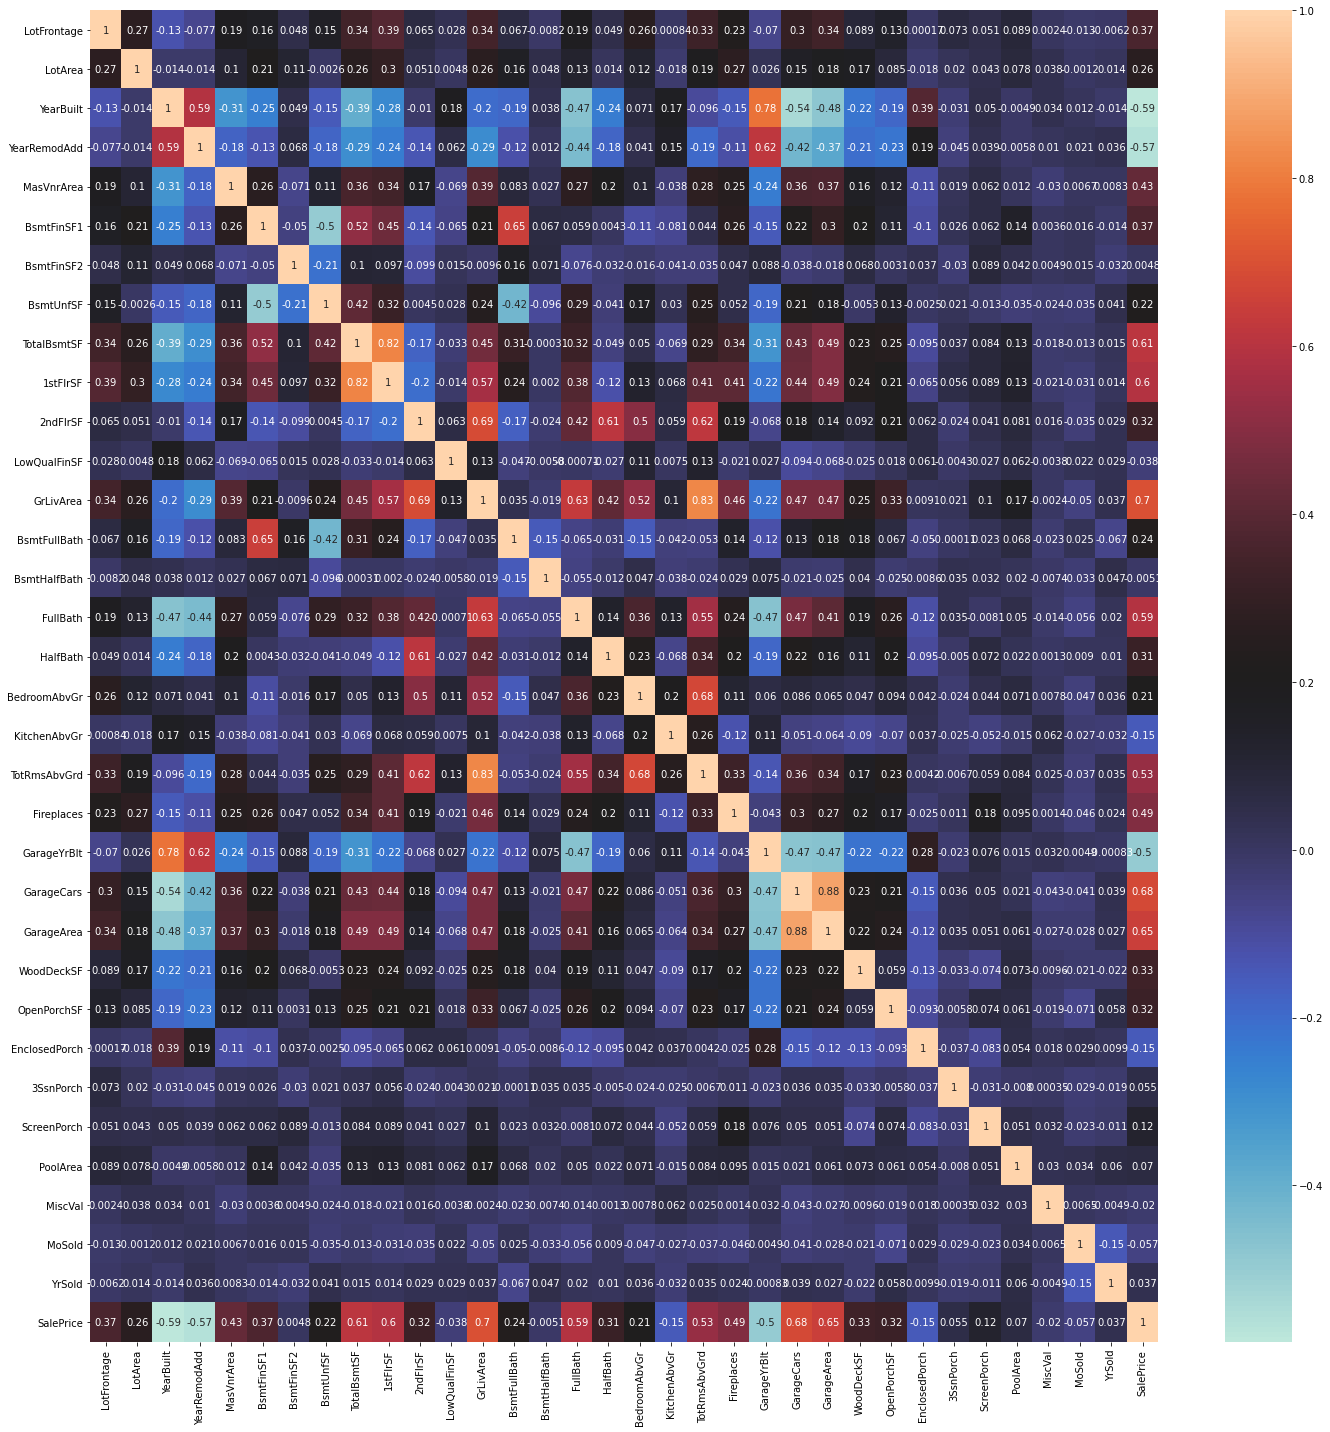

In [65]:
# Check correlation
plt.figure(figsize=[20,20])
sns.heatmap(data[num_col].corr(), annot=True, cmap='icefire')
plt.tight_layout()
plt.show()

- We can observers `Negative` correlation of `SalePrice` with `YearBuilt, GarageYrBlt` and `Positive` correction with `GriLivArea, GarageArea, FullBath, TotalBsmtSF, 1stFlrSF.`

## 3. `Data Preprocessing`

In [66]:
# Import Libraries from sklearn
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
X = data.iloc[:,:-1]
y = data['SalePrice']

### `Create Dummy Variables`

In [68]:
object_column = X.dtypes[(X.dtypes == 'object') | (X.dtypes == 'category')].index

In [69]:
temp = pd.get_dummies(data[object_column], drop_first=True)

In [70]:
temp.shape

(1460, 204)

In [71]:
X.drop(object_column, axis=1, inplace=True)

In [72]:
X = pd.concat([X, temp], axis=1)
X.shape

(1460, 237)

### `Scale Variable`

In [73]:
scaler = MinMaxScaler()

In [74]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

### `Train test split`

In [75]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

### `RFE`

In [76]:
rfe = RFE(estimator = LinearRegression(), n_features_to_select=40)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [77]:
# Create new dataset
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

print(X_train_rfe.shape)
print(X_test_rfe.shape)

(1021, 40)
(438, 40)


## 4. `Model Building`

### `Linear Model`

In [78]:
# Build model
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [79]:
# Predict y_train and y_test
y_train_pred = lm.predict(X_train_rfe)
y_test_pred = lm.predict(X_test_rfe)

In [80]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, y_train_pred))
print('r^2 for test: ', r2_score(y_test, y_test_pred))

r^2 for train:  0.8721281028456256
r^2 for test:  0.871318227788634


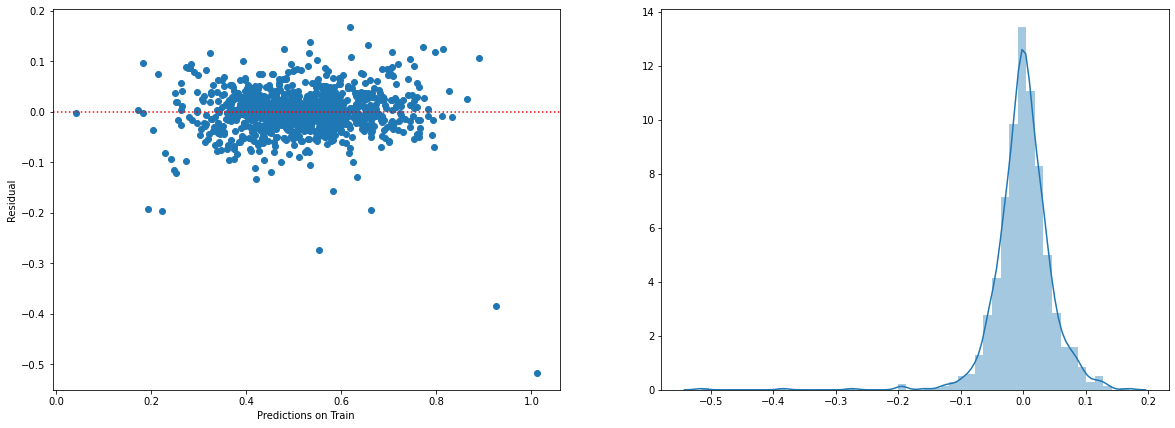

In [81]:
# Residual Analysis
y_train_res = y_train - y_train_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter(y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')

plt.xlabel("Predictions on Train")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)

plt.show()

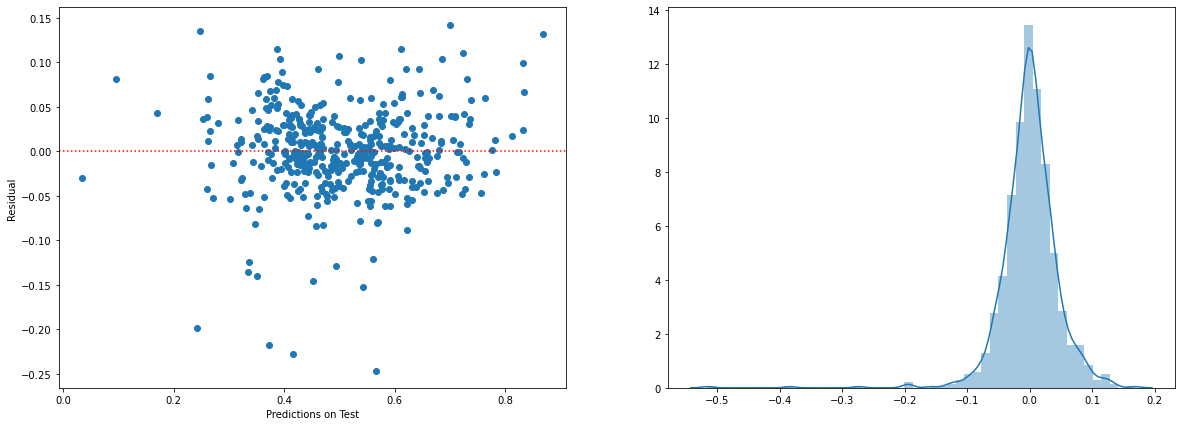

In [82]:
# Residual Analysis
y_test_res = y_test - y_test_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter( y_test_pred , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')

plt.xlabel("Predictions on Test")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)

plt.show()

- Create `X_train_rfe` and `X_test_rfe` based on RFE column.

### `LASSO`

In [83]:
# Build model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                    0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = Lasso(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [85]:
# Create lasso model for best alpha
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001)

In [86]:
# Predict y_train and y_test
y_train_pred = lasso.predict(X_train_rfe).reshape(-1,1)
y_test_pred = lasso.predict(X_test_rfe).reshape(-1,1)

In [87]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, y_train_pred))
print('r^2 for test: ', r2_score(y_test, y_test_pred))

r^2 for train:  0.865400218085413
r^2 for test:  0.8661115259421424


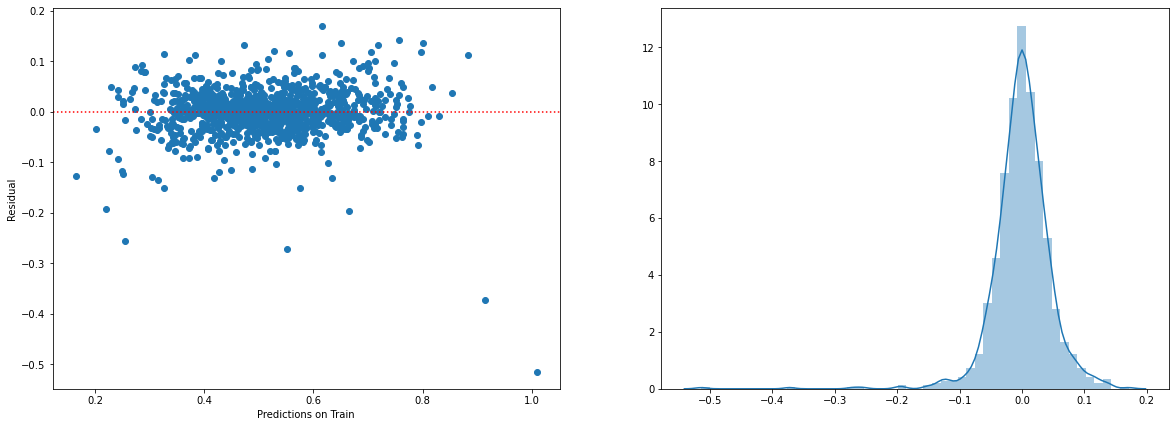

In [88]:
# Residual Analysis
y_train_res = y_train - y_train_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter(y_train_pred, y_train_res)
plt.axhline(y=0, color='r', linestyle=':')

plt.xlabel("Predictions on Train")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)

plt.show()

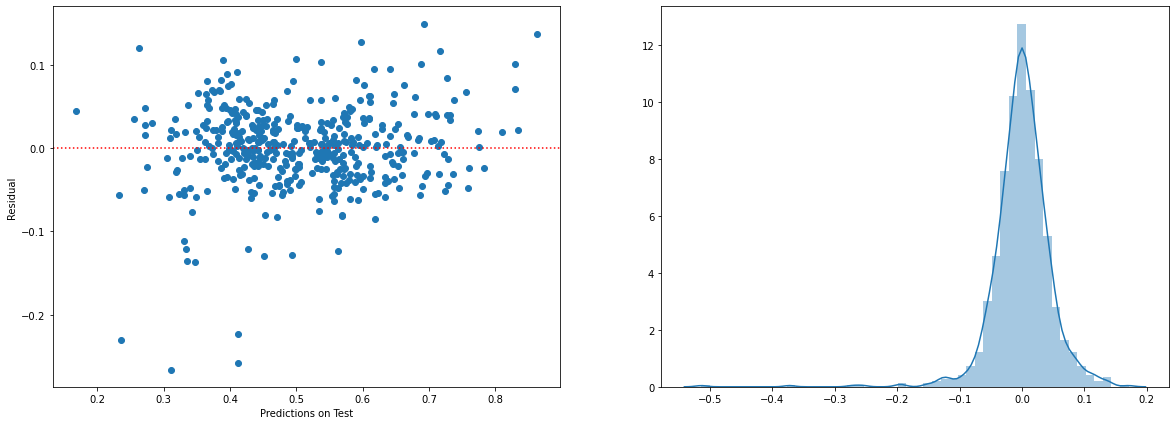

In [89]:
# Residual Analysis
y_test_res = y_test - y_test_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter( y_test_pred , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions on Test")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)
plt.show()

### `RIDGE`

In [90]:
# Build model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                    0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = Ridge(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [92]:
# Create lasso model for best alpha
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=0.01)

In [93]:
# Predict y_train and y_test
y_train_pred = ridge.predict(X_train_rfe).reshape(-1,1)
y_test_pred = ridge.predict(X_test_rfe).reshape(-1,1)

In [94]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, y_train_pred))
print('r^2 for test: ', r2_score(y_test, y_test_pred))

r^2 for train:  0.8721235842589992
r^2 for test:  0.8714343072985424


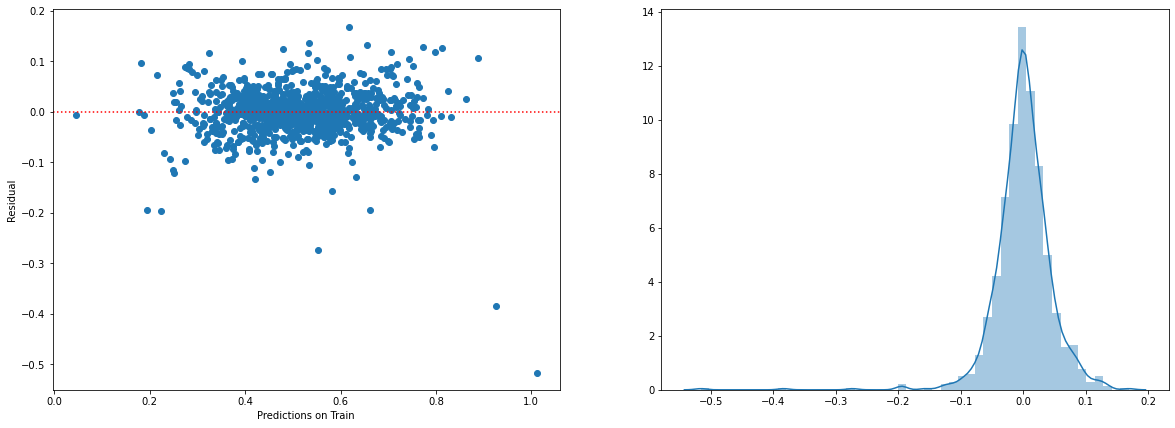

In [95]:
# Residual Analysis
y_train_res = y_train - y_train_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')

plt.xlabel("Predictions on Train")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)

plt.show()

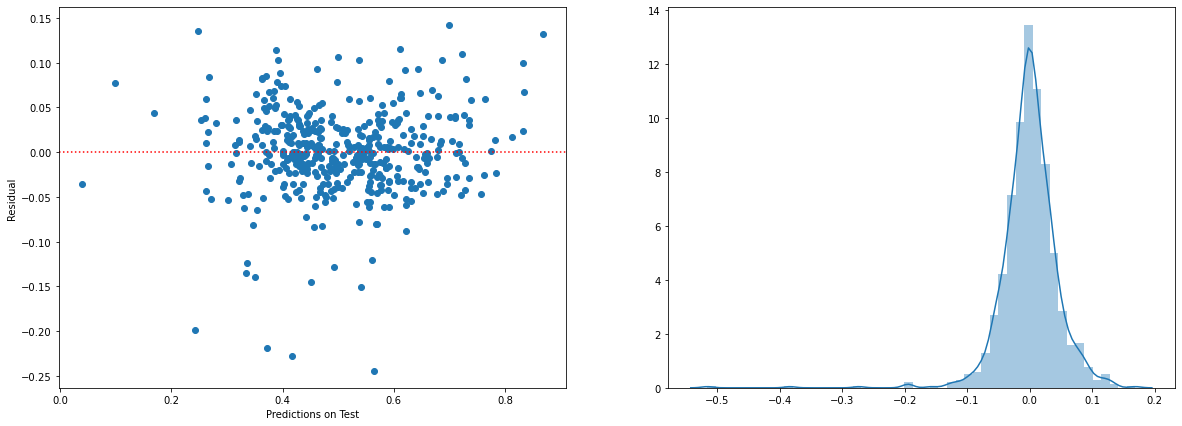

In [96]:
# Residual Analysis
y_test_res = y_test - y_test_pred

plt.figure(figsize=[20,7])

plt.subplot(121)
plt.scatter( y_test_pred , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')

plt.xlabel("Predictions on Test")
plt.ylabel("Residual")

plt.subplot(122)
sns.distplot(y_train_res, kde=True)

plt.show()

### `Compare Betas`

In [97]:
# Create new dataframe
compare = pd.DataFrame(index = X_train_rfe.columns)
compare.rows = X_train_rfe.columns

In [98]:
# Add value
compare['Linear'] = lm.coef_.reshape(-1,)
compare['Lasso'] = lasso.coef_
compare['Ridge'] = ridge.coef_.reshape(-1,)

In [99]:
compare

,Linear,Lasso,Ridge
LotArea,0.156498,0.115316,0.155805
YearBuilt,-0.127465,-0.134132,-0.127701
BsmtFinSF1,0.019738,0.072522,0.021233
BsmtUnfSF,-0.039347,-0.013281,-0.038762
TotalBsmtSF,0.106135,0.006944,0.104710
1stFlrSF,0.170582,0.059630,0.170518
2ndFlrSF,0.064131,0.000000,0.064021
LowQualFinSF,0.033095,0.000000,0.033021
GrLivArea,0.168568,0.336436,0.168464
KitchenAbvGr,-0.092869,-0.068028,-0.092690


In [100]:
top10_lasso = abs(compare).sort_values('Lasso', ascending=False).iloc[0:10,:].index.to_list()
top10_ridge = abs(compare).sort_values('Ridge', ascending=False).iloc[0:10,:].index.to_list()
top10_linear = abs(compare).sort_values('Linear', ascending=False).iloc[0:10,:].index.to_list()

In [101]:
# Top 10 features
top10 = pd.DataFrame({'Lasso':top10_lasso, 
                     'Ridge':top10_ridge, 
                     'Linear':top10_linear})
top10

,Lasso,Ridge,Linear
0,GrLivArea,OverallQual_9,OverallQual_9
1,YearBuilt,OverallQual_8,OverallQual_8
2,OverallQual_9,OverallQual_10,OverallQual_10
3,GarageCars,OverallQual_7,OverallQual_7
4,LotArea,SaleType_Oth,SaleType_Oth
5,OverallQual_8,1stFlrSF,1stFlrSF
6,OverallCond_3,GrLivArea,GrLivArea
7,BsmtFinSF1,LotArea,LotArea
8,KitchenAbvGr,OverallQual_6,OverallQual_6
9,OverallQual_10,OverallQual_5,OverallQual_5


### I would choose lasso as my final model since it reduced 5 co-efficeints to 0.

### `Top10 Features`

***'GrLivArea', 'YearBuilt', 'OverallQual_9', 'GarageCars', 'LotArea', 'OverallQual_8', 'OverallCond_3', 'BsmtFinSF1', 'KitchenAbvGr', 'OverallQual_10'***

# `Assignment `

### `Question 1`

In [102]:
lasso_new = Lasso(alpha=0.0002)
lasso_new.fit(X_train_rfe, y_train)
new_y_train_pred = lasso_new.predict(X_train_rfe)
new_y_test_pred = lasso_new.predict(X_test_rfe)

In [103]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, new_y_train_pred))
print('r^2 for test: ', r2_score(y_test, new_y_test_pred))

r^2 for train:  0.8605587001076054
r^2 for test:  0.8654197066158453


In [104]:
ridge_new = Lasso(alpha=0.02)
ridge_new.fit(X_train_rfe, y_train)
new_y_train_pred = ridge_new.predict(X_train_rfe)
new_y_test_pred = ridge_new.predict(X_test_rfe)

In [105]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, new_y_train_pred))
print('r^2 for test: ', r2_score(y_test, new_y_test_pred))

r^2 for train:  0.003536942019203293
r^2 for test:  0.0023946595209982657


In [106]:
# Create new dataframe
new_compare = pd.DataFrame(index = X_train_rfe.columns)
new_compare.rows = X_train_rfe.columns

In [107]:
# Add value
new_compare['Lasso'] = lasso_new.coef_
new_compare['Ridge'] = ridge_new.coef_.reshape(-1,)

In [108]:
new_top10_lasso = abs(new_compare).sort_values('Lasso', ascending=False).iloc[0:10,:].index.to_list()
new_top10_ridge = abs(new_compare).sort_values('Ridge', ascending=False).iloc[0:10,:].index.to_list()

In [109]:
# Top10 Predictor for new alpha value
print('Lasso')
print(new_top10_lasso)
print('\n')
print('Ridge')
print(new_top10_ridge)

Lasso
['GrLivArea', 'YearBuilt', 'GarageCars', 'OverallQual_9', 'BsmtFinSF1', 'OverallQual_8', 'LotArea', 'OverallCond_3', 'Fireplaces', 'OverallQual_3']


Ridge
['OverallQual_5', 'LotArea', 'YearBuilt', 'OverallQual_3', 'OverallQual_4', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10']


In [110]:
# Top10 Predictor for optimal alpha value
print('Lasso')
print(top10_lasso)
print('\n')
print('Ridge')
print(top10_ridge)

Lasso
['GrLivArea', 'YearBuilt', 'OverallQual_9', 'GarageCars', 'LotArea', 'OverallQual_8', 'OverallCond_3', 'BsmtFinSF1', 'KitchenAbvGr', 'OverallQual_10']


Ridge
['OverallQual_9', 'OverallQual_8', 'OverallQual_10', 'OverallQual_7', 'SaleType_Oth', '1stFlrSF', 'GrLivArea', 'LotArea', 'OverallQual_6', 'OverallQual_5']


#### `Question 3`

In [111]:
new_col = abs(compare).sort_values('Lasso', ascending=False).index[5:]

In [112]:
new_X_train = X_train_rfe[new_col]
new_X_test = X_test_rfe[new_col]

In [113]:
# Build model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                    0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = Lasso(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)

model_cv.fit(new_X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
model_cv.best_params_

{'alpha': 0.0001}

In [115]:
lasso_new = Lasso(alpha=0.0001)
lasso_new.fit(new_X_train, y_train)
new_y_train_pred = lasso_new.predict(new_X_train)
new_y_test_pred = lasso_new.predict(new_X_test)

In [116]:
# Print r^2 score
print('r^2 for train: ', r2_score(y_train, new_y_train_pred))
print('r^2 for test: ', r2_score(y_test, new_y_test_pred))

r^2 for train:  0.798702289356183
r^2 for test:  0.8276610815746422


In [117]:
# Create new dataframe
new_compare = pd.DataFrame(index = new_X_train.columns)
new_compare.rows = X_train_rfe.columns
new_compare['Lasso'] = lasso_new.coef_
new_top10_lasso = abs(new_compare).sort_values('Lasso', ascending=False).iloc[0:10,:].index.to_list()
print(new_top10_lasso)

['1stFlrSF', 'OverallQual_3', 'TotalBsmtSF', 'OverallQual_4', 'KitchenAbvGr', '2ndFlrSF', 'OverallQual_5', 'BsmtFinSF1', 'OverallCond_3', 'OverallQual_6']
